### Spotify Song Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col=['artists','count','popularity'] # considering only these columns
artist=pd.read_csv("data_by_artist.csv",usecols=col)
artist

,artists,popularity,count
0,"""Cats"" 1981 Original London Cast",38.000000,12
1,"""Cats"" 1983 Broadway Cast",33.076923,26
2,"""Fiddler On The Roof” Motion Picture Chorus",34.285714,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",34.444444,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",42.555556,9
...,...,...,...
27616,鳳飛飛,35.000000,2
27617,黃品源,47.000000,2
27618,黃國隆,20.000000,11
27619,黃蜀娟,23.000000,42


In [3]:
genre=pd.read_csv('data_w_genres.csv',usecols=['genres','artists'])
genre

,artists,genres
0,"""Cats"" 1981 Original London Cast",['show tunes']
1,"""Cats"" 1983 Broadway Cast",[]
2,"""Fiddler On The Roof” Motion Picture Chorus",[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",[]
...,...,...
27616,鳳飛飛,"['c-pop', 'classic mandopop', 'vintage chinese..."
27617,黃品源,"['c-pop', 'classic cantopop', 'classic mandopop']"
27618,黃國隆,[]
27619,黃蜀娟,[]


In [4]:
df=pd.merge(artist,genre,on='artists') #merging both the datasets by artists
df.head()

,artists,popularity,count,genres
0,"""Cats"" 1981 Original London Cast",38.000000,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",33.076923,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",34.285714,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",34.444444,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",42.555556,9,[]


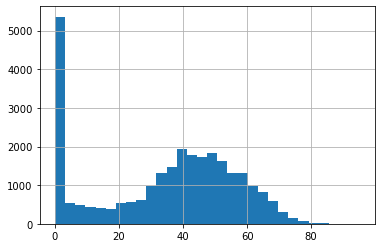

In [5]:
df['popularity'].hist(bins=30) 

#### popularity ratings are mostly in the range of 30-60

In [6]:
#lets move on with TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfv=TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',
                    analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english')

In [7]:
df['genres']=df['genres'].fillna('')

In [8]:
tfv_matrix=tfv.fit_transform(df['genres'])

In [9]:
tfv_matrix

<27621x10118 sparse matrix of type '<class 'numpy.float64'>'
	with 256855 stored elements in Compressed Sparse Row format>

In [10]:
tfv_matrix.shape

(27621, 10118)

In [11]:
# instead of cosine similarity take sigmoid kernel as it is faster
from sklearn.metrics.pairwise import sigmoid_kernel
sig=sigmoid_kernel(tfv_matrix,tfv_matrix)

In [12]:
sig[0]

array([0.76163566, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [13]:
indices=pd.Series(df.index,index=df['artists']).drop_duplicates()

In [14]:
indices

artists
"Cats" 1981 Original London Cast                                       0
"Cats" 1983 Broadway Cast                                              1
"Fiddler On The Roof” Motion Picture Chorus                            2
"Fiddler On The Roof” Motion Picture Orchestra                         3
"Joseph And The Amazing Technicolor Dreamcoat" 1991 London Cast        4
                                                                   ...  
鳳飛飛                                                                27616
黃品源                                                                27617
黃國隆                                                                27618
黃蜀娟                                                                27619
黑豹                                                                 27620
Length: 27621, dtype: int64

In [15]:
# recommending top 10 artists

def rec(artist,sig=sig):
  idx=indices[artist]
  sig_scores=list(enumerate(sig[idx]))
  sig_scores=sorted(sig_scores,key=lambda x: x[1],reverse=True)
  sig_scores=sig_scores[1:11]
  artist_indices=[i[0]for i in sig_scores]
  return df['artists'].iloc[artist_indices]

In [16]:
# let's Test!
rec('Panos Samis')

1                             "Cats" 1983 Broadway Cast
2           "Fiddler On The Roof” Motion Picture Chorus
3        "Fiddler On The Roof” Motion Picture Orchestra
4     "Joseph And The Amazing Technicolor Dreamcoat"...
5     "Joseph And The Amazing Technicolor Dreamcoat"...
6                                "Mama" Helen Teagarden
7                                        "Mista Dj Paul
8                               "Test for Victor Young"
9                                   "Weird Al" Yankovic
10                                               $IMEON
Name: artists, dtype: object